In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
titanic_df = pd.read_csv('tested.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [7]:
titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0], inplace=True)

In [8]:
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

In [9]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

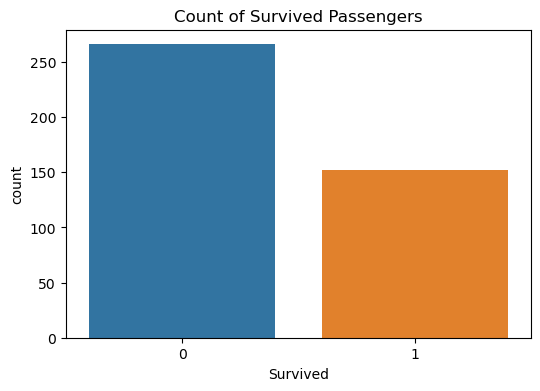

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='Survived')
plt.title('Count of Survived Passengers')
plt.show()

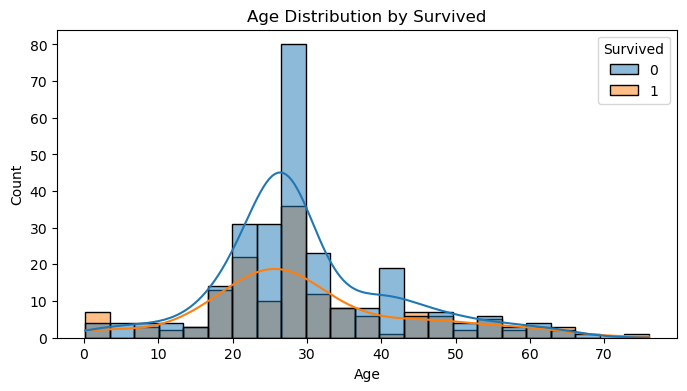

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survived')
plt.show()

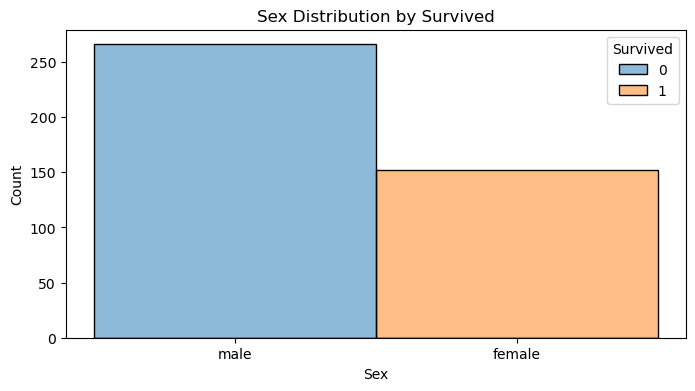

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic_df, x='Sex', hue='Survived', kde=True)
plt.title('Sex Distribution by Survived')
plt.show()

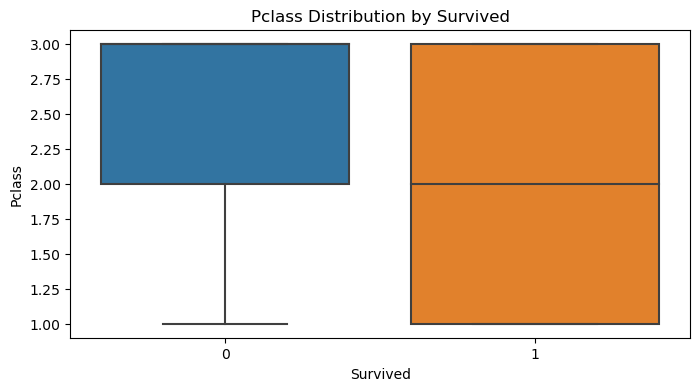

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=titanic_df, x='Survived', y='Pclass')
plt.title('Pclass Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()

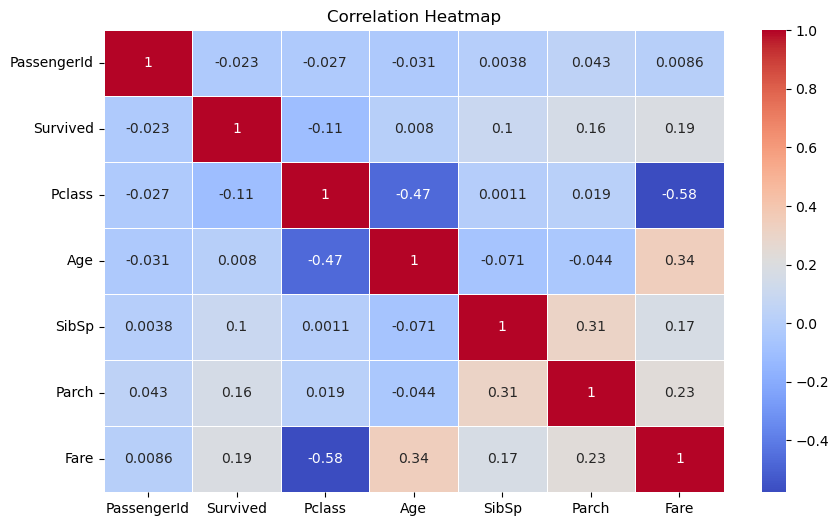

In [14]:
correlation_matrix = titanic_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


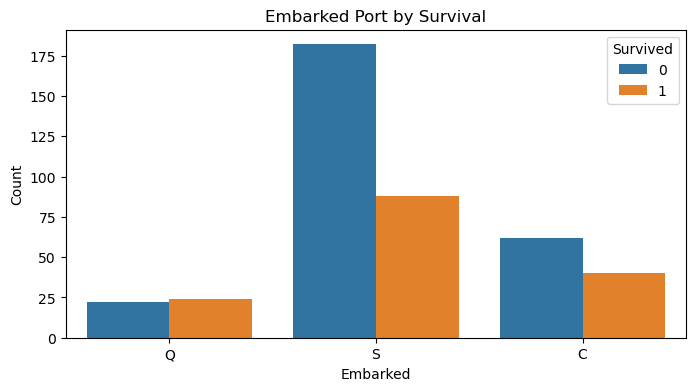

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=titanic_df, x='Embarked', hue='Survived')
plt.title('Embarked Port by Survival')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


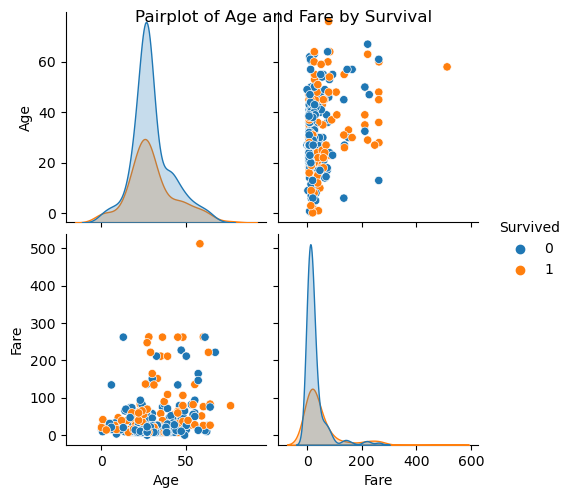

In [16]:
sns.pairplot(data=titanic_df, vars=['Age', 'Fare'], hue='Survived')
plt.suptitle('Pairplot of Age and Fare by Survival')
plt.show()
